In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

PATH_TO_DATA = 'file.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [7]:
data[140]


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3989    0.0
3990    0.0
3991    0.0
3992    0.0
3993    NaN
Name: 140, Length: 3994, dtype: float64

In [8]:
features = data.drop(140, axis=1)
features

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,0.131575,-0.743915,-1.268882,-1.896213,-2.382528,-2.631161,-2.568869,-2.293259,-2.024382,-1.632742,...,-2.646211,-2.986903,-3.425279,-3.683124,-3.413203,-2.748375,-1.731334,-0.754692,-0.218895,0.667505
3990,0.240944,-0.721234,-1.502651,-2.255077,-2.775331,-3.102753,-2.950594,-2.481234,-1.974882,-1.392213,...,-0.781617,-1.349914,-1.911720,-2.206858,-2.858646,-3.429425,-3.800018,-3.125579,-2.177202,-0.889541
3991,-0.299528,-1.358559,-2.114674,-2.693787,-2.618147,-2.472128,-2.173579,-1.842423,-1.283623,-0.700186,...,-0.972587,-1.525311,-2.101135,-2.651482,-3.318640,-3.832036,-4.199930,-3.260794,-2.586855,-1.284573
3992,-0.175004,-0.951439,-1.373705,-2.148458,-2.508234,-2.635273,-2.646770,-2.360859,-1.989830,-1.492923,...,-2.833223,-3.219204,-3.612807,-3.486461,-2.748568,-1.868715,-0.744721,0.141119,0.228110,0.893159


In [11]:
#splitting training and testing dataset
features = data.drop(140, axis=1)
target = data[140]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2
)
train_index=y_train[y_train==1].index
train_data=x_train.loc[train_index]

In [12]:
minmaxscaler=MinMaxScaler(feature_range=(0,1))
x_train_scaled=minmaxscaler.fit_transform(train_data.copy())
x_test_scaled=minmaxscaler.transform(x_test.copy())

In [13]:
class AutoEncoder(Model):
  def __init__(self,output_units,ldim=8):
    super().__init__()
    self.encoder=Sequential([
        Dense(64,activation="relu"),
        Dropout(0.1),
        Dense(32,activation="relu"),
        Dropout(0.1),
        Dense(16,activation="relu"),
        Dropout(0.1),
        Dense(ldim,activation="relu")
    ])
    self.decoder=Sequential([
        Dense(16,activation="relu"),
        Dropout(0.1),
        Dense(16,activation="relu"),
        Dropout(0.1),
        Dense(16,activation="relu"),
        Dropout(0.1),
        Dense(output_units,activation="sigmoid"),
    ])

  def call(self, input):
    encoded=self.encoder(input)
    decoded=self.decoder(encoded)
    return decoded

In [14]:
model=AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(optimizer="adam",loss="msle",metrics=["mse"])
epochs=20
H=model.fit(
    x_train_scaled,x_train_scaled,
    epochs=epochs,
    validation_data=(x_test_scaled,x_test_scaled),
    batch_size=512)

Epoch 1/20
5/5 [==============================] - 2s 77ms/step - loss: 0.0105 - mse: 0.0234 - val_loss: 0.0122 - val_mse: 0.0282
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0103 - mse: 0.0230 - val_loss: 0.0121 - val_mse: 0.0279
Epoch 3/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0101 - mse: 0.0226 - val_loss: 0.0119 - val_mse: 0.0275
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0099 - mse: 0.0219 - val_loss: 0.0117 - val_mse: 0.0270
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0096 - mse: 0.0212 - val_loss: 0.0115 - val_mse: 0.0264
Epoch 6/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0092 - mse: 0.0204 - val_loss: 0.0112 - val_mse: 0.0258
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0088 - mse: 0.0193 - val_loss: 0.0108 - val_mse: 0.0250
Epoch 8/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0083 - mse: 0.0183 - val

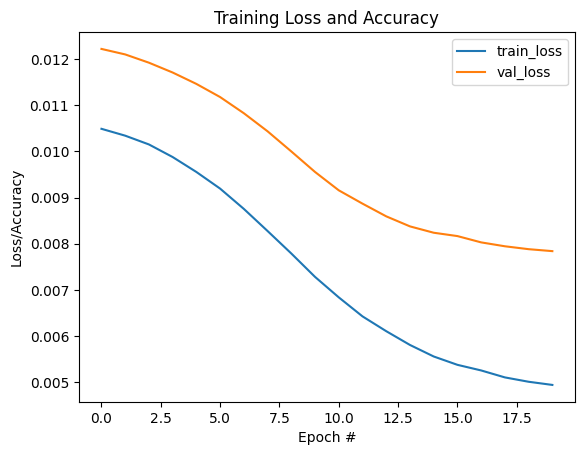

In [15]:
plt.figure()
plt.plot(H.history['loss'],label="train_loss")
plt.plot(H.history['val_loss'],label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [1]:
#finding threshold for anomaly and doing predictions
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
   + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

NameError: ignored

In [ ]:
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)